# Set up

In [2]:
import urllib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
import requests
import tweepy
import os
import json
pd.options.mode.chained_assignment = None

[Project Rubric](https://review.udacity.com/#!/rubrics/1136/view)

File needed:

* wrangle_act.ipynb: code for gathering, assessing, cleaning, analyzing, and visualizing data
* wrangle_report.pdf or wrangle_report.html: documentation for data wrangling steps: gather, assess, and clean
* act_report.pdf or act_report.html: documentation of analysis and insights into final data
* twitter_archive_enhanced.csv: file as given
* image_predictions.tsv: file downloaded programmatically
* tweet_json.txt: file constructed via API
* twitter_archive_master.csv: combined and cleaned data
* any additional files (e.g. files for additional pieces of gathered data or a * database file for your stored clean data)

# Gathering Data

- twitter_archive_enhanced.csv
- image_predictions.tsv
- store each tweet's entire set of JSON data in a file called tweet_json.txt file

### Download archive and image prediction data

In [231]:
# twitter_archive_enhanced.csv
dog_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'

# image_predictions.tsv
dog_images_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'


data_dir = 'DATA'
DATA_DIR = os.path.join('.', data_dir)

if not os.path.isdir(DATA_DIR):
    os.mkdir(DATA_DIR)
image_dir = 'IMAGE'
IMAGE_DIR = os.path.join('.', image_dir)

if not os.path.isdir(IMAGE_DIR):
    os.mkdir(IMAGE_DIR)

def fetch_data(link, name, format='csv',path=DATA_DIR):
  file_path = os.path.join(path, name+'.'+format)
  urllib.request.urlretrieve(link, filename=file_path)
  print('Data downloaded in: ', file_path)

def load_data(name, sep=',', path=DATA_DIR):
  file_path=os.path.join(path, name)
  return pd.read_csv(file_path, sep=sep)

def save_fig(name, path=IMAGE_DIR, format='png', dpi=300):
    img_path = os.path.join(path, name+'.'+format)
    plt.savefig(img_path, dpi=dpi)

In [5]:
fetch_data(dog_url, 'twitter_archive')
fetch_data(dog_images_url, 'image_predictions', format='tsv')

Data downloaded in:  .\DATA\twitter_archive.csv
Data downloaded in:  .\DATA\image_predictions.tsv


In [6]:
archive = load_data('twitter_archive.csv')
imgpred = load_data('image_predictions.tsv', sep='\t')

In [6]:
# check first 3 rows of archive data
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [7]:
# check first 5 rows of image prediction data
imgpred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Credentials (need to create twitter dev account)


In [0]:
with open('credentials.txt') as f: # file not available in submission stage
    identity = {}
    for line in f:
        key, value = line.replace(' ', '').strip('\n').split('=')
        identity[key] = value

consumer_key = identity['consumer_key']
consumer_secret = identity['consumer_secret']
access_token = identity['access_token']
access_secret = identity['access_secret']

### Write json file

In [10]:
import tweepy
import json
import time

## access to tweet database by tweepy api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

## save json data into txt file
file_path = os.path.join(DATA_DIR, 'tweet_json.txt')
tweet_id_list = archive['tweet_id'].values

start = time.time()
fail_to_download = []
with open(file_path, 'w') as f:
  for tweet_id in tweet_id_list:
    try:
      tweet = api.get_status(tweet_id, tweet_mode='extended')
      json.dump(tweet._json, f)
      f.write('\n')
    except:
      fail_to_download.append(tweet_id)
      pass
end = time.time()

print('Used {:.2f} seconds'.format(end-start))
print('Number of downloads:'.format(len(tweet_id_list)-len(fail_to_download)))
print('Number of failure:'.format(len(fail_to_download)))

Used 382.43 seconds
Number of downloads:
Number of failure:


In [12]:
print('Number of downloads:{}'.format(len(tweet_id_list)-len(fail_to_download)))
print('Number of failure:{}'.format(len(fail_to_download)))

Number of downloads:876
Number of failure:1480


In [267]:
# take a look of the first few lines of the output json file
!head -n 1 DATA/tweet_json.txt 

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 540, "h": 528, "resize": "fit"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "large": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

### Read JSON File

In [74]:
import json

In [75]:
file_path = os.path.join(DATA_DIR, 'tweet_json.txt')
countdata = []
with open(file_path) as f:
  for line in f.readlines():
    allcounts = json.loads(line)
    a, b, c = allcounts['id'], allcounts['favorite_count'], allcounts['retweet_count']
    countdata.append([a, b, c])

In [76]:
len(countdata)

939

In [77]:
countdf = pd.DataFrame(countdata, columns=['id', 'favorite_count', 'retweet_count'])
countdf.head()

,id,favorite_count,retweet_count
0,892420643555336193,36114,7692
1,892177421306343426,31159,5689
2,891815181378084864,23466,3774
3,891689557279858688,39404,7858
4,891327558926688256,37631,8465


In [78]:
countdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              939 non-null    int64
 1   favorite_count  939 non-null    int64
 2   retweet_count   939 non-null    int64
dtypes: int64(3)
memory usage: 22.1 KB


# Assessing Data

* detect and document at least eight (8) quality issues and two (2) tidiness issues

### Key Points

**Key points to keep in mind when data wrangling for this project:**

* You only want **original ratings (no retweets) that have images**. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* Cleaning includes merging individual pieces of data according to the rules of tidy data.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### Issues

## Quality Issues (12)

**Twitter Archive Data**
- missing values in a few columns such as `in_reply_to_status_id`, `retweeted_status_id`, etc.
- not all tweets in archive data has image prediction record
- not all tweets are about dog
- ID columns such as `in_reply_to_startus_id`, `in_reply_to_user_id` are in float types
- `timestamp` column should be in datetime type instead of object type
- `rating_denominator` has values other than 10, instead of 10
- `rating_numerator` has values less than 10, instead of greater than 10
- `retweeted_status_id` in scientific numeric format
- `retweeted_status_user_id` in scientific numeric format
- dataframe index `2034` has name as 'a'

**Image Prediction Data**
- `tweet_id` is in numeric type
- tweet_id='675113801096802304' is a dog but the prediction is not


<br>

## Tideness Issues (2)

**Twitter Archive Data**
- `source' column should be split into two columns: platform name, and platform link
- four variables to be extracted from four columns (`doggo`, `floofer`, `pupper` and `puppo`)


#### Tweet archive data Overview

In [0]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [0]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [72]:
#Identify the location where dog name is incorrect
archive.loc[2034]

tweet_id                                                     671743150407421952
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-12-01 17:30:22 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is a Tuscaloosa Alcatraz named Jacob (Yac...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/671743150...
rating_numerator                                                             11
rating_denominator                                                           10
name                                    

#### Image Preiction Data Overview

In [0]:
imgpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [0]:
imgpred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [0]:
imgpred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
179,669324657376567296,https://pbs.twimg.com/media/CUnrN7vUcAAfGvN.jpg,1,seashore,0.201659,False,Cardigan,0.131544,True,sandbar,0.101430,False
689,684188786104872960,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1,kelpie,0.537782,True,American_Staffordshire_terrier,0.082953,True,Staffordshire_bullterrier,0.069760,True
387,673352124999274496,https://pbs.twimg.com/media/CVg6L2hWIAAYuEb.jpg,1,golden_retriever,0.672808,True,Labrador_retriever,0.275885,True,kuvasz,0.022255,True
674,683391852557561860,https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg,1,French_bulldog,0.992833,True,Boston_bull,0.004749,True,pug,0.001392,True
1471,779377524342161408,https://pbs.twimg.com/ext_tw_video_thumb/77937...,1,sundial,0.170921,False,cash_machine,0.060359,False,maze,0.054981,False


#### Count data overview

In [228]:
countdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              939 non-null    int64
 1   favorite_count  939 non-null    int64
 2   retweet_count   939 non-null    int64
dtypes: int64(3)
memory usage: 22.1 KB


In [229]:
countdf.describe()

,id,favorite_count,retweet_count
count,9.390000e+02,939.000000,939.000000
mean,8.095534e+17,12977.985091,4449.239617
std,5.297081e+16,14486.028696,5290.172104
min,6.660209e+17,0.000000,1.000000
25%,7.832102e+17,2155.000000,1766.000000
50%,8.145784e+17,9927.000000,3052.000000
75%,8.460913e+17,18662.000000,5307.000000
max,8.924206e+17,132747.000000,56588.000000


# Cleaning Data

Clean each of the issues you documented while assessing.


### Quality

* <font size='2'>select tweets archive data that has image prediction, and is about dog</font>


In [7]:
cols = ['p1_dog', 'p2_dog', 'p3_dog']
mask = imgpred[cols].any(axis=1) #if any of px_dog is True, it implies it's a dog

print('Total number of dogs identified in dataset: {}'.format(mask.sum()))
dog_id = imgpred.loc[mask, 'tweet_id']

Total number of dogs identified in dataset: 1751


In [8]:
mask = archive['tweet_id'].isin(dog_id.values)
dog_tweets = archive[mask]
len(dog_tweets)

1751

* <font size='2'>include tweet_id='675113801096802304' because the prediction is wrong to state that it is not a dog</font>

In [9]:
imgpred[imgpred['tweet_id']==675113801096802304]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
470,675113801096802304,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1,bow,0.16802,False,quill,0.108807,False,joystick,0.043312,False


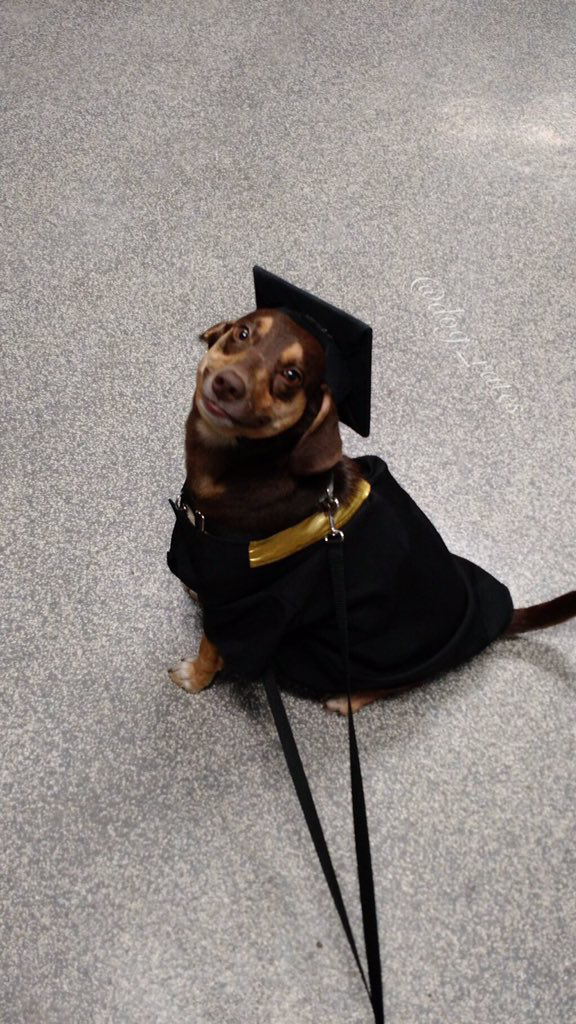

In [10]:
from PIL import Image
import requests

def display_dog_image(tweet_id, df=imgpred):
  link_addr = df.loc[df['tweet_id']==tweet_id, 'jpg_url'].values[0]
  img = Image.open(requests.get(link_addr, stream=True).raw)
  display(img)


tweetid=675113801096802304
display_dog_image(tweetid)

In [9]:
dog_tweets = dog_tweets.append(archive.loc[archive['tweet_id']==675113801096802304, :])
675113801096802304 in dog_tweets['tweet_id'].values

True

* <font size='2'>discard columns that have large portion of missing values</font>

In [62]:
dog_tweets.isnull().sum(axis=0).sort_values(ascending=False)

in_reply_to_status_id         1732
in_reply_to_user_id           1732
retweeted_status_timestamp    1687
retweeted_status_user_id      1687
retweeted_status_id           1687
timestamp                        0
source                           0
text                             0
puppo                            0
pupper                           0
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
tweet_id                         0
dtype: int64

In [10]:
high_missing_cols = dog_tweets.isnull().sum(axis=0).sort_values(ascending=False).head(5).index.tolist()
high_missing_cols

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'retweeted_status_timestamp',
 'retweeted_status_user_id',
 'retweeted_status_id']

In [11]:
dog_tweets.drop(columns=high_missing_cols, axis=1, inplace=True)
dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 1 to 1875
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1752 non-null   int64 
 1   timestamp           1752 non-null   object
 2   source              1752 non-null   object
 3   text                1752 non-null   object
 4   expanded_urls       1752 non-null   object
 5   rating_numerator    1752 non-null   int64 
 6   rating_denominator  1752 non-null   int64 
 7   name                1752 non-null   object
 8   doggo               1752 non-null   object
 9   floofer             1752 non-null   object
 10  pupper              1752 non-null   object
 11  puppo               1752 non-null   object
dtypes: int64(3), object(9)
memory usage: 177.9+ KB


* <font size='2'>change data type of 'tweet_id' to object</font>

In [12]:
dog_tweets['tweet_id'] = dog_tweets['tweet_id'].astype('object')
imagpred['tweet_id'] = imagpred['tweet_id'].astype('object')
dog_tweets['tweet_id'].dtype

dtype('O')

* <font size='2'>change data type of `timestamp` column in datetime type</font>

In [13]:
dog_tweets['timestamp'] = pd.to_datetime(dog_tweets['timestamp'])
dog_tweets['timestamp'].sample(5)

1595   2016-01-11 01:25:58+00:00
1417   2016-02-13 16:50:04+00:00
1159   2016-04-24 01:24:35+00:00
875    2016-08-04 15:48:47+00:00
524    2016-12-15 02:14:29+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

* <font size='2'>revise `rating_denominator` to 10</font>



In [14]:
dog_tweets['rating_denominator'] = 10
dog_tweets['rating_denominator'].unique()

array([10], dtype=int64)

* <font size='2'>revise `rating_numerator` whose vavlue is less than 10 to 11, as the minimum value </font>

In [15]:
new_numer = dog_tweets['rating_numerator'].apply(lambda x: 11 if x<=10 else x)
dog_tweets['rating_numerator'] = new_numer.values
dog_tweets['rating_numerator'].describe()

count    1752.000000
mean       12.208904
std         7.733258
min        11.000000
25%        11.000000
50%        11.000000
75%        12.000000
max       165.000000
Name: rating_numerator, dtype: float64

* <font size='2'>correct the dog name in dataframe index 2034 to 'Jacob' as suggested in the text</font>

In [16]:
dog_tweets.loc[2034, 'name'] = 'Jacob'
dog_tweets.loc[2034]

tweet_id                                             671743150407421952
timestamp                                     2015-12-01 17:30:22+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is a Tuscaloosa Alcatraz named Jacob (Yac...
expanded_urls         https://twitter.com/dog_rates/status/671743150...
rating_numerator                                                     11
rating_denominator                                                   10
name                                                              Jacob
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 2034, dtype: object

### Tidiness

* <font size='2'>`source` column should be split into two columns: platform name, and platform link</font>


In [17]:
dog_tweets['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [18]:
pattern = '(?P<source_link>https?:[^\s\"]*).*(?P<source_Channel>Tw[^<]*)'
source_platforms = dog_tweets['source'].str.extract(pattern)
dog_tweets = dog_tweets.join(source_platforms).drop(columns='source', axis=1)
dog_tweets['source_Channel'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

In [21]:
dog_tweets['source_link'].unique()

array(['http://twitter.com/download/iphone', 'http://twitter.com',
       'https://about.twitter.com/products/tweetdeck'], dtype=object)

* <font size='2'> four variables to be extracted from four columns (doggo, floofer, pupper and puppo) </font>

In [66]:
dog_stage_cols =['doggo', 'floofer', 'pupper', 'puppo']

dog_stage_arr = []

for i, row in dog_tweets[dog_stage_cols].iterrows():
    if row.map(lambda x: x=='None').all():
        dog_stage = 'Unknown'
    else:
        dog_stage = '-'.join(row[row!='None'].values)
    dog_stage_arr.append(dog_stage)

dog_tweets['dog_stage']=dog_stage_arr

In [68]:
dog_tweets.loc[dog_tweets['tweet_id']==733109485275860992, dog_stage_cols+['dog_stage']]

,doggo,floofer,pupper,puppo,dog_stage
1113,doggo,None,pupper,None,doggo-pupper


In [69]:
# get rid of the four columns
dog_tweets = dog_tweets.drop(columns=dog_stage_cols, axis=1)
dog_tweets['dog_stage'].value_counts()

Unknown          1481
pupper            173
doggo              57
puppo              22
doggo-pupper       10
floofer             7
doggo-puppo         1
doggo-floofer       1
Name: dog_stage, dtype: int64

In [116]:
(dog_tweets['dog_stage'] !='Unknown').sum()

271

* <font size='2'>Merge tweets data with image prediction dataframe and counts dataframe</font>

In [146]:
fulldf = dog_tweets.set_index('tweet_id') \
        .join(imgpred.iloc[:, :3].set_index('tweet_id'), how='left') \
        .join(countdf.rename(columns={'id': 'tweet_id'}).set_index('tweet_id'), how='left')
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 892177421306343426 to 675113801096802304
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1752 non-null   datetime64[ns, UTC]
 1   text                1752 non-null   object             
 2   expanded_urls       1752 non-null   object             
 3   rating_numerator    1752 non-null   int64              
 4   rating_denominator  1752 non-null   int64              
 5   name                1752 non-null   object             
 6   source_link         1752 non-null   object             
 7   source_Channel      1752 non-null   object             
 8   dog_stage           1752 non-null   object             
 9   jpg_url             1752 non-null   object             
 10  img_num             1752 non-null   int64              
 11  favorite_count      689 non-null    float64            
 12  ret

### Cleaning Quality Issues Again! 

* <font size='2'>After merging, fill up the missing values in favorite count and retweet count</font>

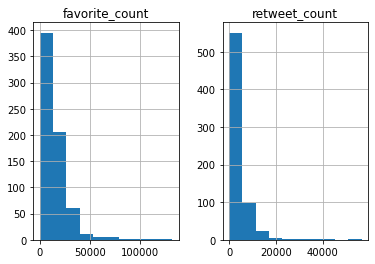

In [149]:
fulldf.iloc[:, -2:].hist();

Since both counts data are skewed to the right, we will use median value to impute the missing value

In [160]:
values = {'favorite_count': fulldf['favorite_count'].median(), 
          'retweet_count': fulldf['retweet_count'].median()}

fulldf = fulldf.fillna(value=values).reset_index()
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1752 non-null   int64              
 1   timestamp           1752 non-null   datetime64[ns, UTC]
 2   text                1752 non-null   object             
 3   expanded_urls       1752 non-null   object             
 4   rating_numerator    1752 non-null   int64              
 5   rating_denominator  1752 non-null   int64              
 6   name                1752 non-null   object             
 7   source_link         1752 non-null   object             
 8   source_Channel      1752 non-null   object             
 9   dog_stage           1752 non-null   object             
 10  jpg_url             1752 non-null   object             
 11  img_num             1752 non-null   int64              
 12  favorite_count      1752 non-null 

# Storing, Analyzing, and Visualizing Data for this Project

- Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv
- At least three (3) insights and one (1) visualization must be produced

### Storing cleaned dataframe

In [161]:
file_path = os.path.join(DATA_DIR, 'twitter_archive_master.csv')
fulldf.to_csv(file_path)

### Analyzing and Visualisationg

* <font size='2'>How many tweets were posted per day by day of week</font>

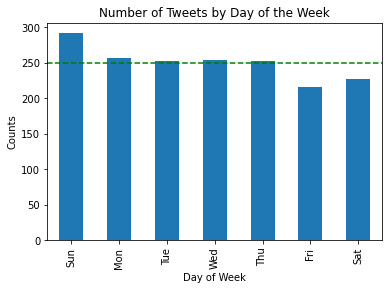

In [183]:
y_mean = fulldf['timestamp'].dt.dayofweek.value_counts().mean()

ax = fulldf['timestamp'].dt.dayofweek.value_counts(sort=False).plot(kind='bar')
ax.axhline(y_mean, c='g', linestyle='--')
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
ax.set_title('Number of Tweets by Day of the Week')
ax.set_ylabel('Counts')
ax.set_xlabel('Day of Week')
save_fig('Number_of_Daily_Tweets')

Above barplots show the total number of counts by each day of the week. On average, there are about 250 tweets per day in our dataset. In particular, Sunday has the most tweets, for about 300, while Friday has the least number of tweets, for about 210.

* <font size='3'>For those tweets with known dog stage status, which is the majority stage?</font>

In [203]:
fulldf['dog_stage'].value_counts()

Unknown          1481
pupper            173
doggo              57
puppo              22
doggo-pupper       10
floofer             7
doggo-puppo         1
doggo-floofer       1
Name: dog_stage, dtype: int64

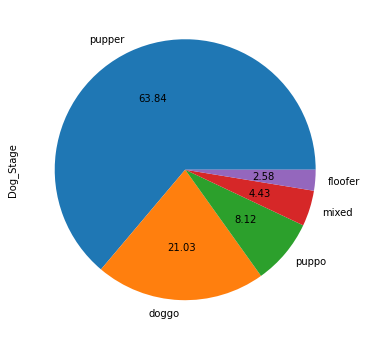

In [202]:
fig, ax = plt.subplots(figsize=(8, 6))

mask = fulldf['dog_stage']=='Unknown' # reduce to known dog stage subsest

dog_stage_reduced = pd.Series(list(map(lambda x: 'mixed' if '-' in x else x, fulldf.loc[~mask, 'dog_stage'])))\
                    .rename('Dog_Stage')

dog_stage_reduced.value_counts().plot(kind='pie', ax=ax, autopct='%.2f')
save_fig('pie_chart_of_dog_stage')

Because majority of the tweets do not imply dog stage, we can extract the data that has dog stage implied for analysis.

The pie chart shows the percentage of dog stage in our tweets data for those known dog stage tweets. Pupper occupied 64% of the dataset, followed by doggo for about 21%. Floofer occupied less than 3% of the know data.

In [204]:
fulldf['timestamp'].describe()

count                          1752
unique                         1752
top       2015-12-08 16:21:41+00:00
freq                              1
first     2015-11-15 22:32:08+00:00
last      2017-08-01 00:17:27+00:00
Name: timestamp, dtype: object

* <font size='3'>Distribution of rating numerator</font>

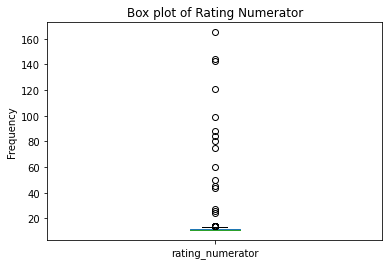

In [235]:
ax = fulldf['rating_numerator'].plot(kind='box')
ax.set_title('Box plot of Rating Numerator')
ax.set_ylabel('Frequency')
ax.set_xlabel('')
save_fig('Box_plot_of_Rating_Numerator');

In [223]:
fulldf['rating_numerator'].describe([.25, .5, .75, .90, .95])

count    1752.000000
mean       12.208904
std         7.733258
min        11.000000
25%        11.000000
50%        11.000000
75%        12.000000
90%        13.000000
95%        13.000000
max       165.000000
Name: rating_numerator, dtype: float64

The range of rating is [12.2, 165]. The rating numerator's boxplot have a long tail in the upper range, indicating lots of large outliers. The average rating is 12, but the standard deviation is very large due to those large outliers.

From 50th to 95th percentile, the score difference is 2, while from 95th to 100th, the differences is 152! This must be a very very lovely dog. Let's take a look.

In [227]:
fulldf.loc[fulldf['rating_numerator'].argmax(), 'jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg'

![highest rating](https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg)

Turns out there are more than 1 dog in the image. That's why! Fair enough.

* <font size='2'>Which tweet has the most favorite counts?</font>

In [216]:
most_favorite_tweet = fulldf.loc[fulldf['favorite_count'].argmax()]
print('Most Favorite Counts: {}'.format(most_favorite_tweet['favorite_count']))
print('\nText:')
print(most_favorite_tweet['text'])

Most Favorite Counts: 132747.0

Text:
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


In [211]:
most_favorite_tweet['jpg_url'] #lovely!

'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg'

![Most Favorite Tweet](https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg)

* <font size='2'>Which tweet has the most retweet counts</font>

In [217]:
most_retweet = fulldf.loc[fulldf['retweet_count'].argmax()]
print('Most Retweet Counts: {}'.format(most_retweet['retweet_count']))
print('\nText:')
print(most_retweet['text'])

Most Retweet Counts: 56588.0

Text:
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d


In [218]:
most_retweet['jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg'

![Most Retweet](https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg)

# Reporting for this Project

Create a 300-600 word written report called `wrangle_report.pdf` or `wrangle_report.html` that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called `act_report.pdf` or `act_report.html` that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Both of these documents can be created in separate Jupyter Notebooks using the Markdown functionality of Jupyter Notebooks, then downloading those notebooks as PDF files or HTML files (see image below). You might prefer to use a word processor like Google Docs or Microsoft Word, however.

# Wrangle report

### Data Referrence:
 1. Twitter Archive Data: twitter_archive_enhanced.csv
 2. Image Prediction Data: image_predictions.tsv
 3. Counts Data: counts extracted by twippy

### Summary:

In the wrangling part, I cleaned up the quality issues and tidiness issues from `twitter_archive_enhanced.csv` and `image_predictions.tsv`, then I merged them together by tweet_id, and added counts from twippy queries.

Because some tweets had missing values in `favorte count` and `retweet count`, I cleaned up the merged dataframe again by imputting missing values.

The cleaned dataframe was then saved into `twitter_archive_master.csv` file.


### Steps:
- Define the problem of each issue listed from Assess stage
- Code
- Test by reviewing the revised data


### Issues:

There are 12 quality issues from two datasets listed below:

- **Twitter Archive Data**
    - not all tweets in archive data has image prediction record
    - not all tweets are about dog
    - missing values in a few columns such as `in_reply_to_status_id`, `retweeted_status_id`, etc.
    - ID columns such as `in_reply_to_startus_id`, `in_reply_to_user_id` are in float types
    - `timestamp` column should be in datetime type instead of object type
    - `rating_denominator` has values other than 10, instead of 10
    - `rating_numerator` has values less than 10, instead of greater than 10
    - `retweeted_status_id` in scientific numeric format
    - `retweeted_status_user_id` in scientific numeric format
    - dataframe index `2034` has name as 'a'

    **Image Prediction Data**
    - `tweet_id` is in numeric type
    - tweet_id='675113801096802304' is a dog but the prediction is not

There are two tidiness issue from Twitter Archive Data:

- **Twitter Archive Data**
    - `source' column should be split into two columns: platform name, and platform link
    - four variables to be extracted from four columns (`doggo`, `floofer`, `pupper` and `puppo`)

### Cleaning solutions:

- **Quality**
    - Filter the data that has dog image, and is predicted as dog, i.e. at least one of [p1_dog, p2_dog, p3_dog] is true
    <br>To do so, we can extract a subset from the main `twitter_archive_enhanced` data whose `tweet_id` is present in `image_prediction` data.
    - Drop the columns that have large number of missing values
    <br>There are five columns, mostly ids, have about 1600 rows containing with missing values, out of 1752 total rows. These colmsn are either ids or timestamp. We cannot impute such value from mathmatical method. So I discarded these columns from the dataset.
    - Fix the wrong dog prediciton on tweet id [`675113801096802304`](https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg) and include this row in to our dataframe
    <br>The image prediction algorithm did not recognize this image as dog, so I reviwed the picture and include this row manually in our final dataframe.
    - Revise all `rating_denominator` into 10 as specifified in the project motivation
    - Revise all the `rating_numerator` to minimum 11 if they are less than 10, to meet the assumption that "they're good dogs Brent."[http://knowyourmeme.com/memes/theyre-good-dogs-brent]
    - Revise `tweet_id` into `object` type
    - Revise `timestamp` into `datatime` type
    - After merging the counts to the tweet archive data, fix the missing value issue in both `favorite_counts` and `retweet_counts` by filling with median value instead of mean due to skewed distribution.
    
<br>

- **Tidiness**
    - Split the `source` column into `platform_name`, and `platform_link`
    - Create a new column `dog_stage` that represent the stage from the original four columns (`doggo`, `floofer`, `pupper` and `puppo`), including the mixed type of more than one kind.
    

# Act Report

In the final stage, I am interested in the answer of below 5 questions:

- *How many tweets were posted per day by day of week*
![](./IMAGE/Number_of_Daily_Tweets.png)

Above barplots show the total number of counts by each day of the week. On average, there are about 250 tweets per day in our dataset. In particular, Sunday has the most tweets, for about 300, while Friday has the least number of tweets, for about 210.

- *For those tweets with known dog stage status, which is the majority stage?*
![](./IMAGE/pie_chart_of_dog_stage.png)

The pie chart shows the percentage of dog stage in our tweets data for those known dog stage tweets. Pupper occupied 64% of the dataset, hence the majority stage in our data. The second largest population is doggo for about 21%. Floofer occupied less than 3% of the know data.

- *Diversity of rating numerator*
![](./Image/Box_plot_of_Rating_Numerator.png)

The range of rating is [12.2, 165]. The rating numerator's boxplot have a long tail in the upper range, indicating lots of large outliers. The average rating is 12, but the standard deviation is very large due to those large outliers.

From 50th to 95th percentile, the score difference is 2, while from 95th to 100th, the differences is 152! This must be a very very lovely dog. Let's take a look.

![highest rating](https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg)

- *Which tweet has the most favorite counts?*

The highest favorite counts is 132747. According to the text, it's a puppo participating in womens march in Toronto.

Here is the picture of the most favorite dog:

![Most Favorite Tweet](https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg)

- *Which tweet has the most retweet counts*

The highest retweeted counts is 56588, and it's a housework helping dog!

![Most Retweet](https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg)

Reference

- [How to Query Twitter Data](https://classroom.udacity.com/nanodegrees/nd002/parts/af503f34-9646-4795-a916-190ebc82cb4a/modules/14d9f5f1-9e7b-4bfb-97f3-bcdbf4a3699c/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/d7e3de1b-d7a1-4ebc-9d58-beba021a7c29)